<a href="https://colab.research.google.com/github/deraldoduran/API-model-v1/blob/master/C%C3%B3pia_de_Projeto_1_Classifica%C3%A7%C3%A3o_bin%C3%A1ria_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Classificação binária brest cancer

## Etapa 1: Importação das bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
import torch
torch.__version__
#!pip install torch==1.4.0

'1.7.0+cu101'

In [4]:
import torch.nn as nn

## Etapa 2: Base de dados

In [5]:
np.random.seed(123)
torch.manual_seed(123)

In [12]:
#import pandas as pd
previsores = pd.read_csv('/content/sample_data/entradas_breast.csv')
classe = pd.read_csv('/content/sample_data/saidas_breast.csv')
#previsores = pd.read_csv('/content/sample_data/entradas_breast.csv')

In [15]:
previsores.shape

(569, 30)

In [16]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [17]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [18]:
np.unique(classe)

array([0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


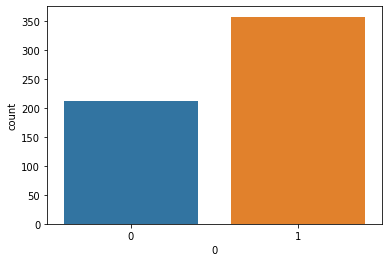

In [19]:
sns.countplot(classe['0']);

In [20]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

In [21]:
previsores_treinamento.shape

(426, 30)

In [22]:
classe_treinamento.shape

(426, 1)

In [23]:
previsores_teste.shape

(143, 30)

In [24]:
classe_teste.shape

(143, 1)

## Etapa 3: Transformação dos dados para tensores


In [25]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [33]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [34]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [35]:
type(previsores_treinamento)

torch.Tensor

In [36]:
type(classe_treinamento)

torch.Tensor

In [37]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [38]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [39]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Construção do modelo

In [40]:
# 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [42]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [43]:
criterion = nn.BCELoss()

In [44]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [46]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad()

    outputs = classificador(inputs) # classificador.forward(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 3.12973
Época   2: perda 3.27783
Época   3: perda 3.13326
Época   4: perda 3.29200
Época   5: perda 3.12005
Época   6: perda 3.14715
Época   7: perda 3.13077
Época   8: perda 3.14991
Época   9: perda 3.13738
Época  10: perda 3.12289
Época  11: perda 3.27739
Época  12: perda 3.11540
Época  13: perda 3.17872
Época  14: perda 3.12592
Época  15: perda 3.27818
Época  16: perda 3.14583
Época  17: perda 3.17374
Época  18: perda 3.18443
Época  19: perda 3.15452
Época  20: perda 3.12261
Época  21: perda 3.14353
Época  22: perda 3.16478
Época  23: perda 3.11736
Época  24: perda 3.11918
Época  25: perda 3.11156
Época  26: perda 3.12270
Época  27: perda 3.10207
Época  28: perda 3.11493
Época  29: perda 3.11041
Época  30: perda 3.11455
Época  31: perda 3.28334
Época  32: perda 3.15596
Época  33: perda 3.13103
Época  34: perda 3.28540
Época  35: perda 3.12406
Época  36: perda 3.26744
Época  37: perda 3.25538
Época  38: perda 3.45480
Época  39: perda 3.17075
Época  40: perda 3.10432


## Etapa 6: Visualização dos pesos

In [47]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())

In [48]:
params

[Parameter containing:
 tensor([[-1.4472e-01, -1.1859e-01, -2.0132e-01, -5.6461e-02, -3.1472e-02,
          -9.2397e-02, -3.1615e-02, -1.5199e-03, -6.6438e-02, -3.4858e-02,
          -5.4382e-02,  4.8891e-03, -1.6903e-01, -1.7313e-01,  3.1291e-16,
          -7.5156e-04, -3.9583e-04, -2.4709e-02, -4.8498e-02, -1.6453e-16,
           1.3088e-01, -1.0403e-01, -8.1431e-02,  4.9095e-02, -3.3937e-02,
          -1.4254e-02, -5.1198e-02, -1.2157e-02,  6.3936e-02, -6.9876e-02],
         [ 2.1684e-01,  5.3967e-02,  3.9308e-01,  1.0629e-01, -4.6097e-01,
          -1.7333e-01, -1.6348e-01, -3.2873e-01,  2.6114e-02,  4.9253e-02,
           3.7776e-02, -7.8363e-02, -9.1475e-03,  1.5673e-01, -1.9145e-02,
          -1.2957e-01,  2.5677e-02,  1.0757e-02,  7.8775e-02, -2.7703e-02,
           2.0542e-01, -1.4152e-01,  2.7780e-01, -6.6723e-03,  9.7306e-02,
          -2.3687e-01, -3.3325e-01,  9.9896e-03, -1.7744e-01, -1.6597e-01],
         [ 3.1434e-02,  5.0107e-02, -6.0054e-02, -1.0508e-01,  1.3392e-02,


In [49]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [50]:
print(pesos0)

Parameter containing:
tensor([[-1.4472e-01, -1.1859e-01, -2.0132e-01, -5.6461e-02, -3.1472e-02,
         -9.2397e-02, -3.1615e-02, -1.5199e-03, -6.6438e-02, -3.4858e-02,
         -5.4382e-02,  4.8891e-03, -1.6903e-01, -1.7313e-01,  3.1291e-16,
         -7.5156e-04, -3.9583e-04, -2.4709e-02, -4.8498e-02, -1.6453e-16,
          1.3088e-01, -1.0403e-01, -8.1431e-02,  4.9095e-02, -3.3937e-02,
         -1.4254e-02, -5.1198e-02, -1.2157e-02,  6.3936e-02, -6.9876e-02],
        [ 2.1684e-01,  5.3967e-02,  3.9308e-01,  1.0629e-01, -4.6097e-01,
         -1.7333e-01, -1.6348e-01, -3.2873e-01,  2.6114e-02,  4.9253e-02,
          3.7776e-02, -7.8363e-02, -9.1475e-03,  1.5673e-01, -1.9145e-02,
         -1.2957e-01,  2.5677e-02,  1.0757e-02,  7.8775e-02, -2.7703e-02,
          2.0542e-01, -1.4152e-01,  2.7780e-01, -6.6723e-03,  9.7306e-02,
         -2.3687e-01, -3.3325e-01,  9.9896e-03, -1.7744e-01, -1.6597e-01],
        [ 3.1434e-02,  5.0107e-02, -6.0054e-02, -1.0508e-01,  1.3392e-02,
          3.33

In [51]:
# 30 -> 16 -> 16 -> 1
bias0 = params[1]
bias0.shape

torch.Size([16])

In [52]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [53]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Etapa 7: Avaliação do modelo

In [54]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [55]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [56]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [57]:
type(previsores_teste)

torch.Tensor

In [58]:
previsoes = classificador.forward(previsores_teste)

In [59]:
previsoes

tensor([[9.9393e-01],
        [1.0000e+00],
        [4.7815e-01],
        [8.7165e-01],
        [9.7153e-05],
        [9.7470e-01],
        [7.4032e-01],
        [9.9494e-01],
        [9.3739e-01],
        [8.0440e-01],
        [9.1755e-01],
        [9.9990e-01],
        [1.8463e-02],
        [9.9822e-01],
        [9.4277e-01],
        [4.0119e-01],
        [9.9825e-01],
        [1.0000e+00],
        [4.4819e-01],
        [9.9998e-01],
        [3.3696e-11],
        [5.6173e-03],
        [4.6567e-01],
        [1.0000e+00],
        [9.5365e-01],
        [1.8494e-02],
        [9.7576e-01],
        [9.9711e-01],
        [1.7748e-04],
        [9.9960e-01],
        [2.4710e-01],
        [9.9977e-01],
        [7.3776e-01],
        [9.8115e-01],
        [2.6316e-01],
        [9.9954e-01],
        [7.3857e-01],
        [9.9995e-01],
        [9.9730e-01],
        [5.1523e-04],
        [4.2962e-02],
        [8.9854e-01],
        [1.1211e-06],
        [1.3034e-01],
        [1.4114e-03],
        [7

In [60]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [61]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [62]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.8741258741258742

In [63]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[44, 10],
       [ 8, 81]])

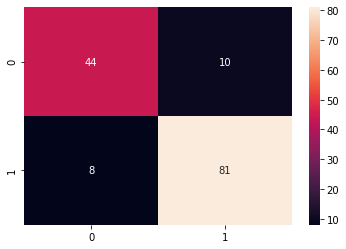

In [64]:
sns.heatmap(matriz, annot=True);